# Analise dos atacantes brasileiros para copa de 2022.

<center><img src="https://upload.wikimedia.org/wikipedia/pt/thumb/e/e3/2022_FIFA_World_Cup.svg/200px-2022_FIFA_World_Cup.svg.png"
      width="200"
     height="250"  ></center>

A cada 4 anos na humanidade, ocorre o maior evento de competição esportiva relacionada ao futebol, **Copa do Mundo**, sendo organizado pela Federação Internacional de Futebol (FIFA). Este ano, será mais uma chance da seleção brasileira se empenhar a buscar o hexa campeonato.

Para entender-mos melhor como funciona a copa do mundo, a pos eliminatorias separadas por regiões do mundo( Europeias, Sulamericas, Oceania, COCOAF-America central e America do norte e o Caribe,Africana, Asiatica), os melhores seleções das regiões ,entrão em um formato de 4 seleções por grupo, sendo 8 grupos no total.

O Brasil está situado no grupo G formado: Brasil, Servia, Suíça,Camarões. Passam-se dois time por grupo , fazendo oitavas de finais e assim sussecivamente.
<center><img src="https://midias.correiobraziliense.com.br/_midias/jpg/2022/04/01/copa_do_mundo_2022_grupo_g-7685464.jpeg"
      width="250"
     height="150"  ></center>

Mas por que a copa do mundo é o objetivo central desse artigo? Como já foi dito, o fator é de ele ser simplesmente o maior evento de competição do mundo do futebol, e o pais que o mais ganhador é o brasil, **Obtendo 5 copas do mundo**, onde eu quem vós fala moro, logo faz parte de nossa vida. E por fim, estou me dando ao trabalho de analisar os atacantes da seleção brasileira.


# Busca pelos dados dos jogadores em seus clubes.




Como analisar o jogador é algo muito relativo, pois há varias nuancias que o jogo se impostam ao jogo de futebol e ao proprio em si jogador.

A parti desse codigo , consumi a api, e me vi em uma dura realidade de não ter que fazer uma aplicação que consuma-a , pois o tempo de resposta ficaria com muita latencia,e o meu objetivo principal é analisar os dados que os jogadores fizeram na temporada 20/21 , com isso faz que eu analise, trate e faça ponderaçoes ,sobre o impactado deles em seus clubes e na seleção.

In [ ]:
#importando requests para consumir a api.
import requests

## Este é um pequeno codigo de como eu busquei os dados dos jogadores na api em seus clube.
## Para não ficar repetitivo , o codigo dos dados na seleção será ocutado, porem é o mesmo processo.

#setando os arquivos para facilitar na obtenção de dados
viniStats = open("data_vini.json","w")
neyStats = open("data_ney.json","w")
gabiStats = open("data_gabi.json","w")
jesusStats = open("data_jesus.json","w")
pedroStats = open("data_pedro.json","w")
raphaStats = open("data_rapha.json","w")
antonyStats = open("data_antony.json","w")

#url da api em variavel.
url = "https://divanscore.p.rapidapi.com/players/get-statistics"

# variaveis para obtenção dos dados dos jogadores.
vini_stats = {"playerId":"868812","tournamentId":"8","seasonId":"37223","type":"overall"}
neymar_stats = {"playerId":"124712","tournamentId":"34","seasonId":"37167","type":"overall"}
gabriel_stats = {"playerId":"794839","tournamentId":"17","seasonId":"37036","type":"overall"}
antony_stats = {"playerId":"958380","tournamentId":"37","seasonId":"36890","type":"overall"}
pedro_stats = {"playerId":"840219","tournamentId":"325","seasonId":"36166","type":"overall"}
gabi_stats = {"playerId":"358554","tournamentId":"325","seasonId":"36166","type":"overall"}
raphinha_stats = {"playerId":"831005","tournamentId":"17","seasonId":"37036","type":"overall"}


headers = {
	"X-RapidAPI-Key": "87a1ec80b7msh6ebcac9aab37d7bp1d8a4ajsn1b11258ba03d",
	"X-RapidAPI-Host": "divanscore.p.rapidapi.com"
}
players_stats = [
    vini_stats,
    neymar_stats,
    gabi_stats,
    gabriel_stats,
    antony_stats,
    raphinha_stats,
    pedro_stats
]
responses = []
#resposta para meu resquests se baseando em cada jogador
for stats in players_stats:
    response = requests.request("GET", url, headers=headers, params=stats)
    responses.append(response)

#Por fim, como não quero usar a api na minha teoria ,por simplesmente não ter nada interativo,mas sim algo que eu consiga depois, com o pandas tratar os dados necessarios, sem ter que fazer requisição a toda hora.
#Basicamento o que foi feito é pegar da api e escrever em arquivos para depois tratar em um arquivo.
viniStats.write(response.text)
viniStats.close()
#Daqui para frente fiz com todos os outros jogadores.
#Finalmente irei tratar os dados necessarios para a minha tese, criando um arquivo novo.


# Tratamento dos dados selecionado para o projeto.



Abaixo segue o modelo do arquivo .json que foi tratado a mão, pois é uma melhor visualização dos dados comparado do arquivo base da api, que contem muito mais dados e não é a melhor forma de separar os dados para o projeto.

In [ ]:
#Pedaço do arquivo que será usado para conferir a tese.
{
    "totalRatingBySofascore": {
        "pedro": 6.86,
        "vini": 7.35,
        "gabigol": 7.20,
        "neymar": 7.46,
        "anthony": 7.43,
        "raphinha": 6.96,
        "jesus": 7.18
    }


Para uma melhor visualização de quais tipos de dados serão usados neste projeto, segue em codigo:

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

ply = pd.read_json('https://raw.githubusercontent.com/LuisNunes301/analys-player-brasil/main/stats_players.json')

ply.dtypes


totalRatingBySofascore    float64
appearence                  int64
goals                       int64
assist                      int64
start                       int64
bigChancesCreated           int64
succDribbles                int64
totalDuelWon                int64
bestInMatch                 int64
dtype: object

Para fim, segue a tabela do arquivo completo.

In [2]:
ply.head(10)

,totalRatingBySofascore,appearence,goals,assist,start,bigChancesCreated,succDribbles,totalDuelWon,bestInMatch
pedro,6.86,24,7,5,15,4,15,69,0
vini,7.35,35,17,10,30,13,95,218,8
gabigol,7.20,18,12,5,18,7,8,28,3
neymar,7.46,22,13,6,22,15,58,162,4
anthony,7.43,23,8,4,21,7,42,111,2
raphinha,6.96,35,11,1,34,10,62,182,2
jesus,7.18,28,8,8,21,8,46,111,3


Então, por fim temos nossas chaves e seus resultados, se baseando em cada atributo de seus respectivos jogadores.
Agora iremos entender o que cada um deles representa.

---

  ###### Tabela das variaveis:
  1. **totalRatingBySofascore** = ranquemento em numero, baseado em uma formula do sofacore para fim de representar a media de bons numeros do jogador por partida.
  2. **appearence** = Jogos que o jogador , em especifico jogou na temporada.
  3. **goals** = Gols do jogador.
  4. **start** = Jogos que o jogador, começou desde o primeiro minuto.
  5. **assist** = Assistencia a gols que o jogador deu ao companheiro de equipe.
  6. **bigChancesCreated** = Grandes chances no jogo criada, que possam ter sido ou não resultado de um gol, mas sim algo claro que poderia ser convertido.
  7. **succDribbles** = Sucesso de dribles do jogador ,em cima de outros adversario.
  8. **totalDuelWon** = Duelos que o jogador ganhou,sobre outro adversario.
  9. **bestInMatch** = Melhor em campo da partida que jogou.

# Analise dos dados dos jogadores.



### 1 - Copia do dataFrame original.

Conforme, a analise fiz a escolha de copiar o meu data frame principal, para que caso eu tenha que mexer em algo, não precisarei ter que ficar fazendo backUps, e sim só replicar e editar da melhor maneira conveiente.

In [3]:
# Criando uma copia do dataFrame original , com intuito de se houve uma mudança não perder tudo.
plyCopy = ply.copy()
print(plyCopy)


          totalRatingBySofascore  appearence  goals  assist  start  \
pedro                       6.86          24      7       5     15   
vini                        7.35          35     17      10     30   
gabigol                     7.20          18     12       5     18   
neymar                      7.46          22     13       6     22   
anthony                     7.43          23      8       4     21   
raphinha                    6.96          35     11       1     34   
jesus                       7.18          28      8       8     21   

          bigChancesCreated  succDribbles  totalDuelWon  bestInMatch  
pedro                     4            15            69            0  
vini                     13            95           218            8  
gabigol                   7             8            28            3  
neymar                   15            58           162            4  
anthony                   7            42           111            2  
raphinha     

### 2 - Em topicos os principais graficos dos dados selecionados, com intuito de explicitar o melhor jogador entre eles.


#####     Media de gols por partida dos jogadores selecionados na temporada de 21/22.

In [4]:
# Tratei de fazer a media de cada jogador para facilitar uma construção de um novo df.

mdVi= numpy.divide(plyCopy['goals']['vini'],plyCopy['appearence']['vini'])
mdPe = numpy.divide(plyCopy['goals']['pedro'],plyCopy['appearence']['pedro'])
mdRa = numpy.divide(plyCopy['goals']['raphinha'],plyCopy['appearence']['raphinha'])
mdJe = numpy.divide(plyCopy['goals']['jesus'],plyCopy['appearence']['jesus'])
mdAnt = numpy.divide(plyCopy['goals']['anthony'],plyCopy['appearence']['anthony'])
mdGab = numpy.divide(plyCopy['goals']['gabigol'], plyCopy['appearence']['gabigol'])
mdNey = numpy.divide(plyCopy['goals']['neymar'],plyCopy['appearence']['neymar'])



Text(0, 0.5, 'media x.G/p')

<Figure size 800x600 with 0 Axes>

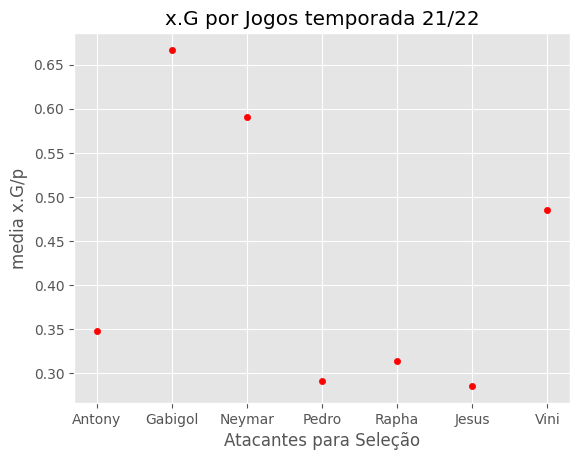

In [24]:
# X Jogadores.
x = ['Antony','Gabigol','Neymar','Pedro','Rapha','Jesus', 'Vini']
# Y x.G de cada jogador.
y = [mdAnt,mdGab,mdNey,mdPe,mdRa,mdJe,mdVi]


dfMediaXg = pd.DataFrame({'Jogadores brasileiros':x,'media x.G/p':y})
plt.style.use('ggplot')

plt.figure(figsize=(8,6))
scatter = dfMediaXg.plot.scatter(
    title= "x.G por Jogos temporada 21/22",
    x = 'Jogadores brasileiros', 
    y ='media x.G/p', color= 'red',
)


scatter.set_xlabel("Atacantes para Seleção")
scatter.set_ylabel("media x.G/p")



Podemos vê, que o jogador Gabriel Barbosa ,se destaca em gols na temporada, porem ele tem jogos menos na temparada que o restante. Neymar , vem atrás na media , mas com mais jogos e menos gols, contudo sendo impactante em seu clube.

Este é o grafico com dados mais importante para atacantes ,em modo geral, são numeros que comprovam o impacto do atacante, como assim? No esporte, o fazer 'gol' é o que representa uma vitoria ou uma não derrota para o futebol, porém uma media alta, podemos dizer 0.6 acima ,podemos dizer que boa media para um atacante.

#####     Total de jogos que o jogadores fizeram na temporada de 21/22.


pedro       24
vini        35
gabigol     18
neymar      22
anthony     23
raphinha    35
jesus       28
Name: appearence, dtype: int64 





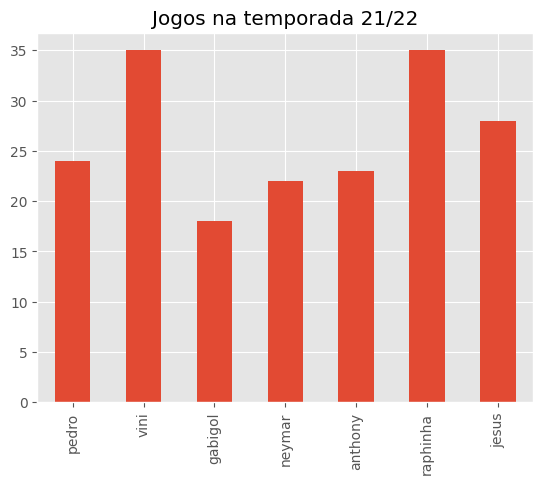

In [15]:
plyCopy['appearence'].plot.bar(title = 'Jogos na temporada 21/22')
print(plyCopy['appearence'],'\n\n\n')



#### Rating do sofascore na temporada de 21/22.



Este rating, representa a media na temporada 21/22 de cada jogador. No site em especifico , todos os rating > 7 são verdes, acima de > 8 são azulados, estes em especificos são medias de notas boas, abaixo de < 6 são represetados pela cor vermelha, dizendo assim que a condição daquela partida e/ou media da tempoarada foi a baixo do esperado.

<Axes: title={'center': 'Rating baseado no sofacores - Média Temporada 21/22'}>

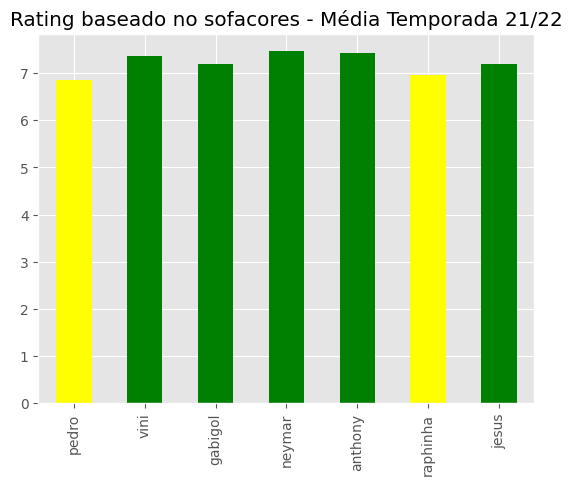

In [32]:
plyCopy['totalRatingBySofascore'].plot.bar(title = "Rating baseado no sofacores - Média Temporada 21/22",color = ['green' if x > 7 else 'blue' if x > 8 else 'red' if x < 6 else 'yellow' for x in plyCopy['totalRatingBySofascore']])

Assim, vemos que os jogadores tiveram uma regularidade boa em seus clubes, mesmo não sendo o principal jogador em gols, assistências e / ou chances criadas, mas sim complementando e jogando em alto nivel em suas posições e clubes. Dá para explificar 3 melhores jogadores se baseando no rating , Vinicius Junior, Neymar, Antony, sendo muito regulares e até sendo protagonista em alguns jogos.

#### Total de assistencia na temporada de 21/22.



<Axes: title={'center': 'Assistencias do jogadores temporada 21/22'}>

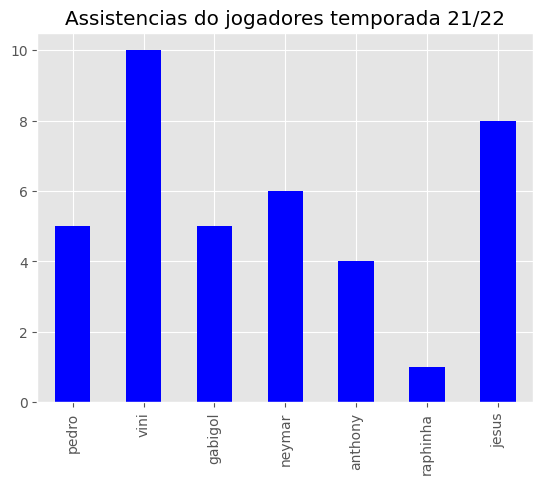

In [34]:
# Total de assistencia na temporada
plyCopy['assist'].plot.bar(title= 'Assistencias do jogadores temporada 21/22',color='blue')


Como podemos perceber , Vinicius Junior e Jesus , tiveram um impacto significativo a seus clubes, com passes a gol, a assistência.

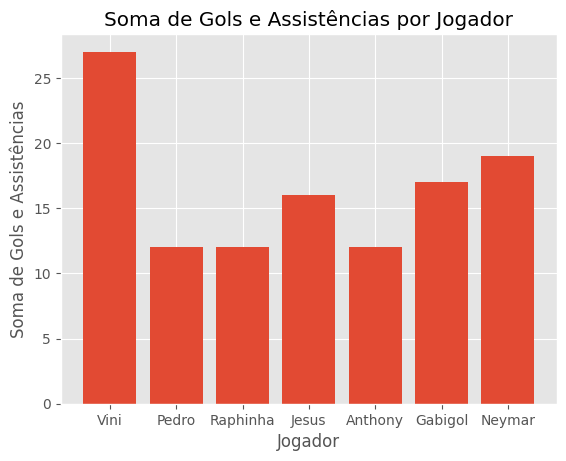

In [38]:
gols = [plyCopy['goals']['vini'], plyCopy['goals']['pedro'], plyCopy['goals']['raphinha'], plyCopy['goals']['jesus'], plyCopy['goals']['anthony'], plyCopy['goals']['gabigol'], plyCopy['goals']['neymar']]
assistencias = [plyCopy['assist']['vini'], plyCopy['assist']['pedro'], plyCopy['assist']['raphinha'], plyCopy['assist']['jesus'], plyCopy['assist']['anthony'], plyCopy['assist']['gabigol'], plyCopy['assist']['neymar']]
soma_gols_assist = [g + a for g, a in zip(gols, assistencias)]

import matplotlib.pyplot as plt

plt.bar(['Vini', 'Pedro', 'Raphinha', 'Jesus', 'Anthony', 'Gabigol', 'Neymar'], soma_gols_assist)
plt.xlabel('Jogador')
plt.ylabel('Soma de Gols e Assistências')
plt.title('Soma de Gols e Assistências por Jogador')
plt.show()

#### Sucesso de dribles.



<Axes: title={'center': 'Sucesso de dibles'}>

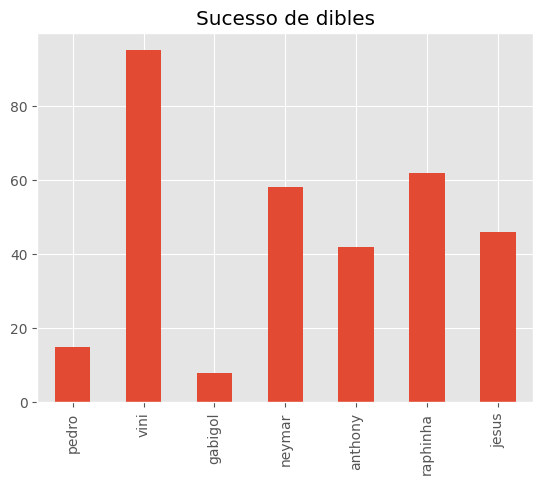

In [39]:
#Sucesso de dribles
plyCopy['succDribbles'].plot.bar(title= "Sucesso de dibles")

Um dado muito importante , apesar que nem sempre é um resultado de um gol ou assistência. Necessario para darmos impactos contra uma defesa muito fechada , mostrar o nosso futebol , enfim umm dado muito importante para um ataque que queira ser chamado de completo. Vinicius Junior,por ter uma caracteristica fisica e forma de jogar , fez uma temporada acima dos demais.

#### Partidas iniciadas.


Dado importante, pois sendo titular é o primeiro passo a sucesso de um jogador, o que acontece a pos , dai é exclusivamente de cada jogador.

<Axes: title={'center': 'Partidas que iniciou no titular'}>

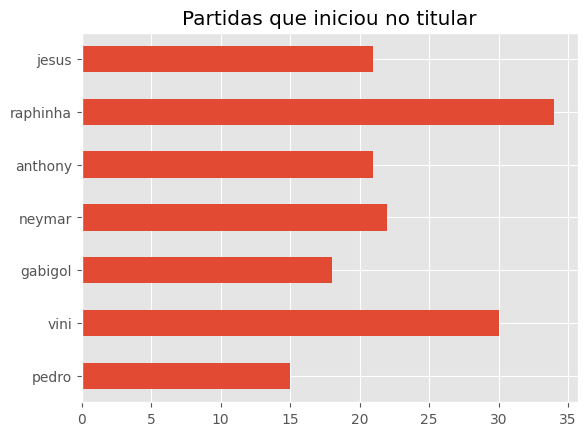

In [40]:
# Partidas iniciadas
plyCopy['start'].plot.barh(title= "Partidas que iniciou no titular")

#### Duelos ganhos.


<Axes: title={'center': 'Duelos ganhos contra adv. em partidas'}>

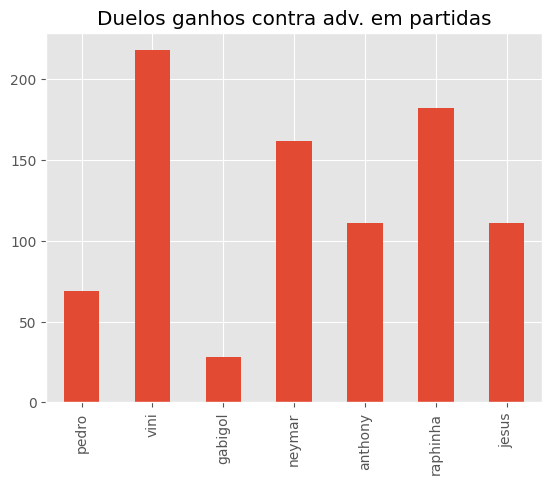

In [41]:
# Duelos ganhos
plyCopy['totalDuelWon'].plot.bar(title = "Duelos ganhos contra adv. em partidas")

#### Melhor em campo.


Recompensa de cada jogador a pós um grande jogo, dado pela empresa da competição no jogo em especifico. Mais uma vez, vemos Vinicius Junior como protagonista.

<Axes: title={'center': 'Melhor em campo'}>

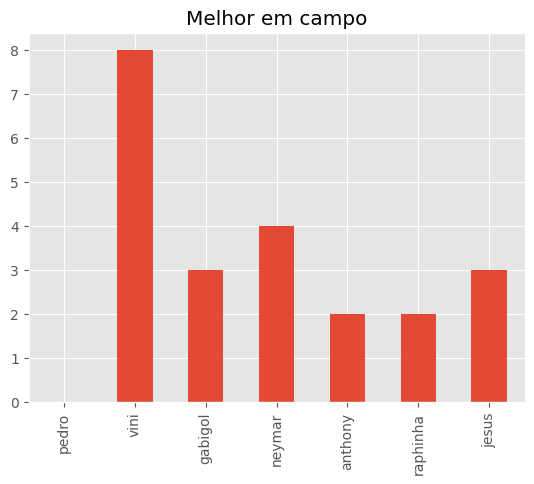

In [42]:
# Melhor em campo
plyCopy['bestInMatch'].plot.bar(title = "Melhor em campo")

#### Matriz de correlação

Text(0.5, 1.0, 'Matriz de Correlação')

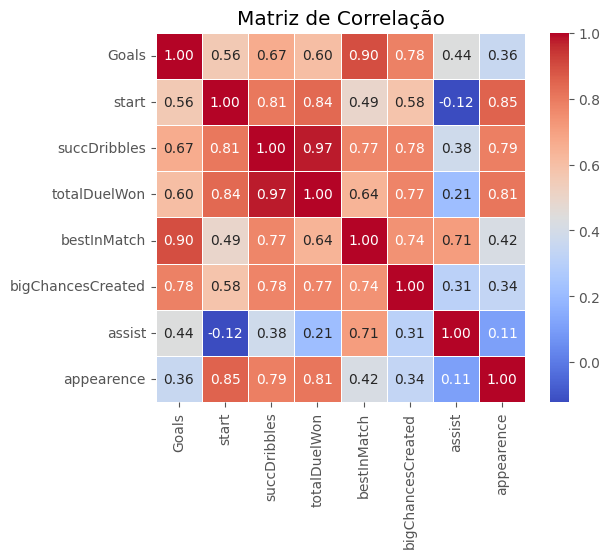

In [47]:
import seaborn as sn
playersName= plyCopy['goals'].keys()

gGoals= plyCopy['goals'].values
gSucc= plyCopy['succDribbles'].values
gDwon= plyCopy['totalDuelWon'].values
gMvp= plyCopy['bestInMatch'].values
gStar= plyCopy['start'].values
gChances= plyCopy['bigChancesCreated'].values
gAssist= plyCopy['assist'].values
gApp= plyCopy['appearence'].values



dfGols = pd.DataFrame({'Jogadores':playersName,'Goals':gGoals,'start':gStar,'succDribbles':gSucc,
                       'totalDuelWon':gDwon,'bestInMatch':gMvp,'bigChancesCreated':gChances,'assist':gAssist,'appearence':gApp})
correlation = dfGols.corr(numeric_only=True)
plot = sn.heatmap(correlation, annot=True, fmt=".2f", linewidths=.6, cmap='coolwarm', square=True)
plot.set_title('Matriz de Correlação')


# Conclusão


Destaque para Vinicius Junior , do Real madrid. Esse jogador pode não ter mais gols que alguns atacantes escolhidos, porém a varias valencias que ele granha, dentre os outros jogadores. É o jogador que mais teve impacto, sucessos, progressos no temporada de 21/22. Logo, podemos dizer que é necessario que ele esteja , como titular e convocadissimo na copa de 2022.
<center><img src="https://pbs.twimg.com/media/FI7lICVWUAEfEdw?format=jpg&name=4096x4096"
      width="200"
     height="200"  ></center>

Como podemos observar em cada grafico, há jogadores do brasil que se destacam em uma coisa , outros aspectos diferentes, que resultam em ações diferentes e impactos distintos a cada jogo e a seus clubes. Por fim, é explicito que os nomes aqui podem ou não podem aparecer na lista final da seleção brasileira. Porém se baseando em uma temporada completa, estes foram os jogadores que tiveram destaques em seus clubes, com sucessos e insucessos da temporada.